# **3. Data Analysis**

#### **3.1 Descriptive Statistics**

We use the csv file "sample_e.csv" with:
- **Environment Score final**
- **GHG Total tCO2eq (model or physical)**
- **Scope 1 tCO2eq (model or physical)**
- **Scope 2 tCO2eq (model)**
- **Scope 3 upstream tCO2eq (model and/or physical)**
- **Scope 3 downstream tCO2eq (model or physical)**

**Example 1: Summary Statistics
 with `describe()`**

In [1]:
import pandas as pd

df = pd.read_csv("data/sample_e.csv")

`df.info()` used to quickly summarize the structure of a DataFrame.

It provides:
- The number of non-null entries for each column.
- The data types of each column.
- The total memory usage of the DataFrame.

In [2]:
df[["ISIN", "Country"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ISIN     4249 non-null   object
 1   Country  4249 non-null   object
dtypes: object(2)
memory usage: 66.5+ KB


In [3]:
import pandas as pd

df = pd.read_csv("data/sample_e.csv")

# Renaming columns for the visualizations to make them more concise
df = df.rename(columns={
    'Environment Score final': 'E Score',
    'GHG Total tCO2eq (model or physical)': 'GHG Total',
    'Scope 1 tCO2eq (model or physical)': 'Scope 1',
    'Scope 2 tCO2eq (model)': 'Scope 2',
    'Scope3 upstream tCO2eq (model and/or physical)': 'Scope 3 Upstream',
    'Scope3 downstream tCO2eq (model or physical)': 'Scope 3 Downstream'
})

# Customize display options in Pandas to avoid scientific notation
pd.set_option('display.float_format', '{:,.0f}'.format)

# Select the relevant columns for descriptive statistics
cols = [
    'E Score', 'Scope 1', 'Scope 2', 'Scope 3 Upstream', 'Scope 3 Downstream']
# Generate descriptive statistics for the selected columns
df_stats = df[cols].describe()
print(df_stats.round(2))

       E Score     Scope 1    Scope 2  Scope 3 Upstream  Scope 3 Downstream
count    4,249       4,249      4,249             4,249               4,249
mean        40   3,282,126    780,817         4,106,916           9,595,983
std         14  14,495,277  2,617,969        35,546,606          65,423,476
min          0           0          0                 0                   0
25%         30      57,544     36,377           193,845             261,657
50%         40     240,407    127,021           679,648           1,003,355
75%         50   1,179,430    504,902         2,437,760           3,316,810
max         83 285,915,410 56,495,002     1,504,839,693       1,814,473,607


**Calculating Mean, Median, and Mode**


In [4]:
# Calculate the mean and median 
mean_ghg = df['E Score'].mean()
median_ghg = df['E Score'].median()

print(f"Mean E Score: {mean_ghg}")
print(f"Median E Score: {median_ghg}")

Mean E Score: 40.01553306660391
Median E Score: 40.0


**Variance and Standard Deviation**


In [5]:
# Variance and standard deviation for 'Scope 1 tCO2eq (model or physical)'
variance_scope1 = df['E Score'].var()
std_dev_scope1 = df['E Score'].std()

print(f"Variance of Scope 1: {variance_scope1}")
print(f"Standard Deviation of Scope 1: {std_dev_scope1}")

Variance of Scope 1: 205.6532426595113
Standard Deviation of Scope 1: 14.34061514229816


**Minimum and Maximum Values**

In [6]:
# Min and max for 'Scope 3 upstream tCO2eq (model and/or physical)'
min_scope3_upstream = df['Scope 3 Upstream'].min()
max_scope3_upstream = df['Scope 3 Upstream'].max()

print(f"Min Scope 3 Upstream: {min_scope3_upstream}")
print(f"Max Scope 3 Upstream: {max_scope3_upstream}")

Min Scope 3 Upstream: 0.0
Max Scope 3 Upstream: 1504839693.2080648


**Distribution of Environment Score Final**

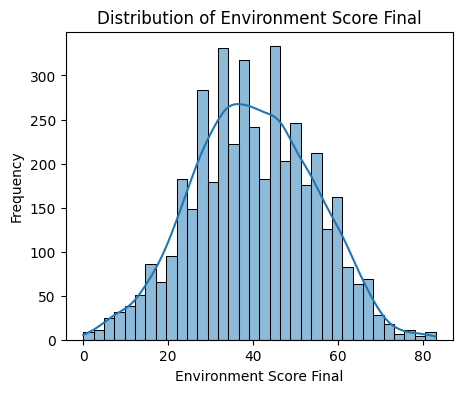

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Environment Score final
plt.figure(figsize=(5, 4))
sns.histplot(df['E Score'], kde=True)
plt.title('Distribution of Environment Score Final')
plt.xlabel('Environment Score Final')
plt.ylabel('Frequency')
plt.show()

**Scatter Plot of GHG Total vs Environment Score**

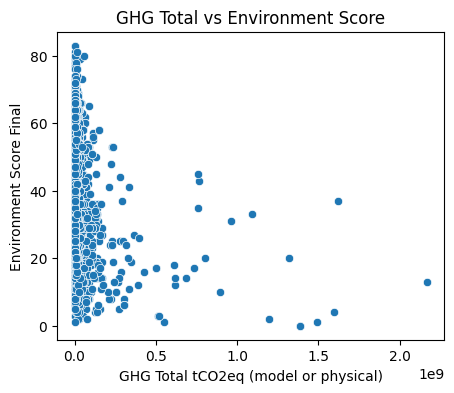

In [8]:
# Scatter plot: GHG Total vs Environment Score
plt.figure(figsize=(5, 4))
sns.scatterplot(x='GHG Total', y='E Score', data=df)
plt.title('GHG Total vs Environment Score')
plt.xlabel('GHG Total tCO2eq (model or physical)')
plt.ylabel('Environment Score Final')
plt.show()

**Boxplot for Scope 1, 2, and 3 GHG Emissions**

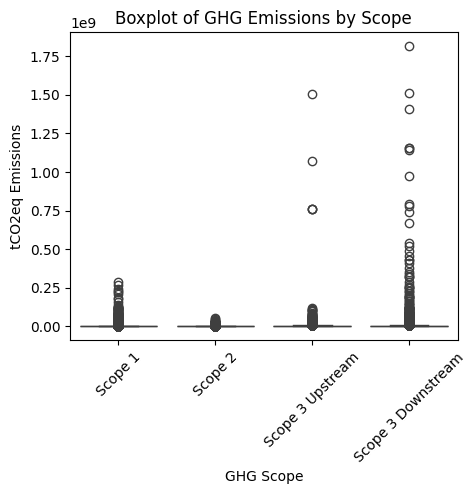

In [9]:
# Updated Boxplot for Scope 1, 2, and 3 GHG emissions with contracted column names
plt.figure(figsize=(5, 4))

# Use the renamed columns for GHG scopes
ghg_cols_renamed = ['Scope 1', 'Scope 2', 'Scope 3 Upstream', 'Scope 3 Downstream']
df_melted_renamed = df.melt(value_vars=ghg_cols_renamed, var_name='GHG Scope', value_name='tCO2eq Emissions')

sns.boxplot(x='GHG Scope', y='tCO2eq Emissions', data=df_melted_renamed)
plt.xticks(rotation=45)
plt.title('Boxplot of GHG Emissions by Scope')
plt.show()

#### **3.2 Correlation and dependence Analysis**

In [10]:
pd.set_option('display.float_format', '{:,.2f}'.format)

cols = [
    'E Score', 'GHG Total', 'Scope 1', 'Scope 2', 'Scope 3 Upstream', 'Scope 3 Downstream'
]
# Correlation matrix for environmental scores and GHG emissions
corr_matrix = df[cols].corr()
print(corr_matrix)

                    E Score  GHG Total  Scope 1  Scope 2  Scope 3 Upstream  \
E Score                1.00      -0.18    -0.20    -0.12             -0.03   
GHG Total             -0.18       1.00     0.57     0.56              0.53   
Scope 1               -0.20       0.57     1.00     0.69              0.16   
Scope 2               -0.12       0.56     0.69     1.00              0.29   
Scope 3 Upstream      -0.03       0.53     0.16     0.29              1.00   
Scope 3 Downstream    -0.18       0.88     0.42     0.40              0.11   

                    Scope 3 Downstream  
E Score                          -0.18  
GHG Total                         0.88  
Scope 1                           0.42  
Scope 2                           0.40  
Scope 3 Upstream                  0.11  
Scope 3 Downstream                1.00  


**Correlation Heatmap for GHG Emissions and Environment Score**

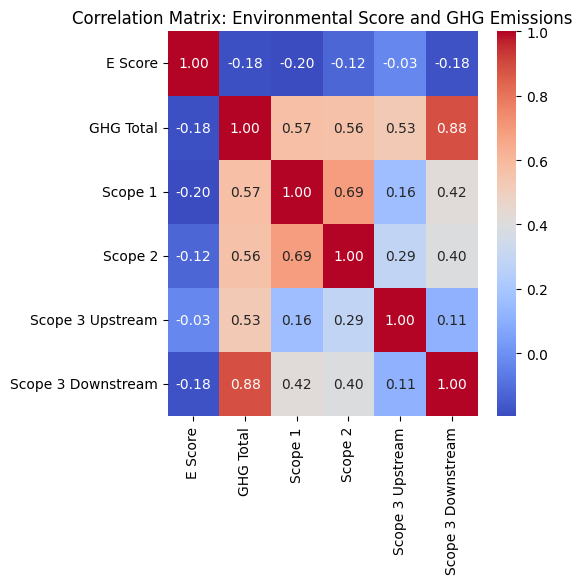

In [11]:
cols = [
    'E Score', 'GHG Total', 'Scope 1', 'Scope 2', 'Scope 3 Upstream', 'Scope 3 Downstream'
]
# Correlation matrix for environmental scores and GHG emissions
corr_matrix = df[cols].corr()

# Correlation heatmap for GHG emissions and environment score
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix: Environmental Score and GHG Emissions')
plt.show()

#### **Anscombe's Quartet: The Fallacy of Pearson Correlation**

The Anscombe's Quartet consists of four datasets that have nearly identical statistical properties, such as mean, variance, and Pearson correlation, but very different distributions and relationships when plotted.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Anscombe's Quartet dataset
anscombe = sns.load_dataset("anscombe")

# Display first few rows of the dataset
print(anscombe.head())

  dataset     x    y
0       I 10.00 8.04
1       I  8.00 6.95
2       I 13.00 7.58
3       I  9.00 8.81
4       I 11.00 8.33


**Calculate Summary Statistics**

In [13]:
# Calculate Pearson correlation for each dataset
datasets = anscombe['dataset'].unique()
correlations = {}

for dataset in datasets:
    subset = anscombe[anscombe['dataset'] == dataset]
    corr = subset['x'].corr(subset['y'])
    correlations[dataset] = corr

# Display the Pearson correlations
print("Pearson Correlations:")
for dataset, corr in correlations.items():
    print(f"Dataset {dataset}: Pearson correlation = {corr:.2f}")

Pearson Correlations:
Dataset I: Pearson correlation = 0.82
Dataset II: Pearson correlation = 0.82
Dataset III: Pearson correlation = 0.82
Dataset IV: Pearson correlation = 0.82


**Visualize the Datasets**

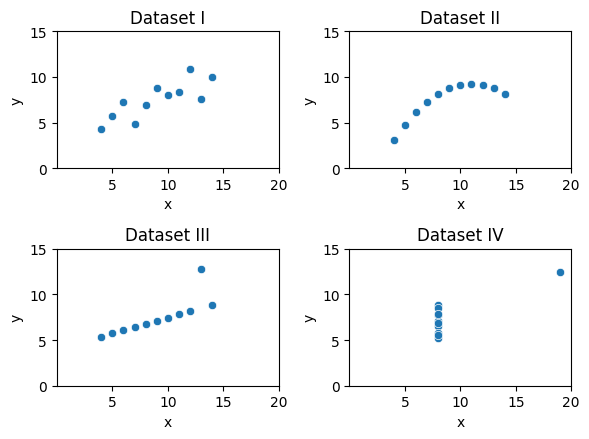

In [14]:
# Plot Anscombe's Quartet to illustrate the fallacy of using Pearson correlation alone

# Create a 2x2 plot
plt.figure(figsize=(6, 4.5))

for i, dataset in enumerate(datasets, 1):
    plt.subplot(2, 2, i)
    subset = anscombe[anscombe['dataset'] == dataset]
    
    # Create scatter plot
    sns.scatterplot(x='x', y='y', data=subset)
    
    # Set the title
    plt.title(f"Dataset {dataset}")
    
    # Set x and y ticks to integer values only
    plt.xlim([0, 20])
    plt.ylim([0, 15])
    plt.xticks([5, 10, 15, 20])  # Adjust based on your data range
    plt.yticks([0, 5, 10, 15])      # Adjust based on your data range

plt.tight_layout()

plt.show()
